In [54]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

import array_to_latex as a2l

Text(0, 0.5, 'A.U.')

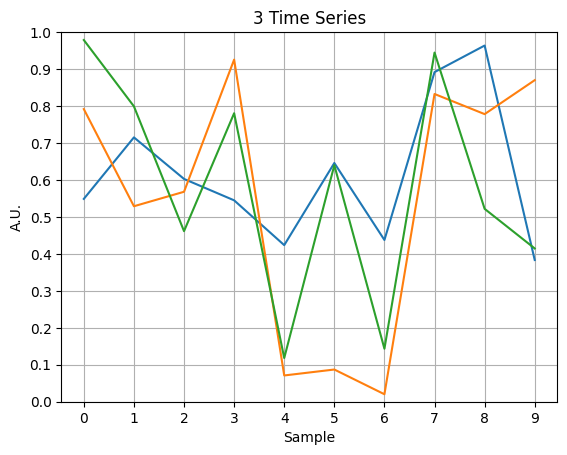

In [64]:
np.random.seed(0)
data = np.random.rand(3,10)

fig, ax = plt.subplots()
ax.plot(data.T)
# Set ticks by 1 for both x and y axes
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.grid(True)
ax.set_ylim(0,1)
ax.set_title('3 Time Series')
ax.set_xlabel('Sample')
ax.set_ylabel('A.U.')

Text(0, 0.5, 'A.U.')

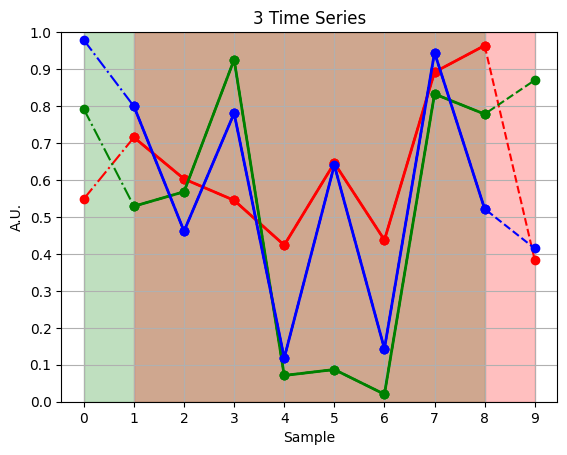

In [66]:

X = data[:,:-1] # All sample rows except the last
Y = data[:,1:] # All sample rows except the first

fig, ax = plt.subplots()
colors = ['r', 'g', 'b']  



# Plot each line with a specific color
for i in range(X.shape[0]):
    ax.plot(X[i,:], color=colors[i], linestyle='-.', marker='o')
window_size = X.shape[1] 
end = 0 + window_size -1
patch = plt.Rectangle((0,0),end,1, color='green', alpha=0.25)
ax.add_patch(patch)

xs = np.arange(Y.shape[1]) + 1
# Plot each line with a specific color
for i in range(Y.shape[0]):
    ax.plot(xs, Y[i,:], color=colors[i], linestyle='--', marker='o')
window_size = Y.shape[1] 
patch = plt.Rectangle((1,0),window_size-1,1, color='red', alpha=0.25)
ax.add_patch(patch)

xs = np.arange(Y.shape[1]) + 1
# Plot each line with a specific color
for i in range(Y.shape[0]):
    ax.plot(xs[:-1], Y[i,:-1], color=colors[i], linestyle='-', marker='o',linewidth=2)


# Set ticks by 1 for both x and y axes
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.grid(True)
ax.set_ylim(0,1)
ax.set_title('3 Time Series')
ax.set_xlabel('Sample')
ax.set_ylabel('A.U.')



Paper

Dynamical network models (DNMs) are generative models that characterize how each iEEG channel dynamically influences the rest of the iEEG network. The interictal DNM takes the form of a linear time-varying (LTV) model that mathematically describes how each observed brain region (iEEG channel signal) interacts with other regions. The LTV DNM is composed of a sequence of linear time-invariant (LTI) DNMs derived from smaller windows of the data. Each LTI model takes the following form:

$S\vec{eeg}(t)=\vec{eeg}(t+1) \Leftarrow\Rightarrow \vec{eeg}(t)=S^{-1}\vec{eeg}(t+1)$


translated to variables:

$Sx[:,0]=y[:,1] \Leftarrow\Rightarrow x[:,0]=S^{-1}y[:,1] $


but we don't know S and need to solve for it

so instead lets setup a equation:




In [63]:
print('X(0):', X[0])
print('Y(0):', Y[0])

X(0): [0.5488135  0.71518937 0.60276338]
Y(0): [0.54488318 0.4236548  0.64589411]


$A \begin{bmatrix}0.55 \\0.72 \\0.60 \end{bmatrix} = \begin{bmatrix}0.55 \\0.42 \\0.64 \end{bmatrix}  \Leftarrow\Rightarrow \begin{bmatrix}0.55 \\0.72 \\0.60 \end{bmatrix} = A^{-1}\begin{bmatrix}0.55 \\0.42 \\0.64 \end{bmatrix}$


